In [306]:
from selenium import webdriver
# from webdriver_manager.chrome import ChromeDriverManager   # 크롬드라이버 동작이 잘 안되서 파이어폭스로 실행
# options = webdriver.ChromeOptions()
options = webdriver.FirefoxOptions()

# 다운로드 경로 설정
default_download_path = "download_dir"

# Firefox 프로파일 설정
options.set_preference("browser.download.folderList", 2)
options.set_preference("browser.download.manager.showWhenStarting", False)
options.set_preference("browser.download.dir", default_download_path)
options.set_preference("browser.helperApps.neverAsk.saveToDisk", "application/octet-stream")

# 웹 드라이버 설정
driver = webdriver.Firefox(options=options)

In [307]:
google_trends_url = "https://trends.google.co.kr/trends?geo=KR&hl=ko"
driver.get(google_trends_url)

In [308]:
from selenium.webdriver.common.by import By

# 탐색 버튼 클릭
driver.find_elements(By.CLASS_NAME, "VfPpkd-RLmnJb")[1].click()
driver.implicitly_wait(5)

In [380]:
# 브라우저 줌 레벨을 50%로 설정
driver.execute_script("document.body.style.zoom='50%'")

In [381]:
# 검색 키워드 목록
keyword_list = ["알레르기성 결막염", "결막염", "알레르기 질환", "알레르기", "수족구병", "수족구", "온열질환", "장염", "식중독", "폐렴", "호흡계통의 질환", "감기", "인플루엔자", "한랭질환"]

In [382]:
from selenium.webdriver.common.keys import Keys
import time

def input_text(input_element, text):
    # input_element.send_keys(Keys.CONTROL + "a")
    # input_element.send_keys(Keys.COMMAND + "a")
    input_element.clear()
    input_element.send_keys(text)
    time.sleep(0.2)
    input_element.send_keys(Keys.ENTER)

In [383]:
import pandas as pd

date_format = "%-m/%-d/%Y"
date_format_text = "%m%d%Y"

# 시작 날짜와 종료 날짜에 대해 월별로 첫날과 마지막 날을 생성
# 각 달의 첫날과 마지막 날을 문자열로 추가
def date_range(start, end):
    date_range = pd.date_range(start=start, end=end, freq='MS')  # 각 달의 시작일
    search_date_list = []
    text_date_list = []
    for date in date_range:
        first_day = date.strftime(date_format)
        last_day = (date + pd.offsets.MonthEnd(0)).strftime(date_format)
        search_date_list.extend([first_day, last_day])
        
        first_day_text = date.strftime(date_format_text)
        last_day_text = (date + pd.offsets.MonthEnd(0)).strftime(date_format_text)
        text_date_list.extend([first_day_text, last_day_text])
    
    return search_date_list, text_date_list

search_date_list, text_date_list = date_range("20190101", "20240501")
print("Search Date List:", search_date_list)
print("Text Date List:", text_date_list)

Search Date List: ['1/1/2019', '1/31/2019', '2/1/2019', '2/28/2019', '3/1/2019', '3/31/2019', '4/1/2019', '4/30/2019', '5/1/2019', '5/31/2019', '6/1/2019', '6/30/2019', '7/1/2019', '7/31/2019', '8/1/2019', '8/31/2019', '9/1/2019', '9/30/2019', '10/1/2019', '10/31/2019', '11/1/2019', '11/30/2019', '12/1/2019', '12/31/2019', '1/1/2020', '1/31/2020', '2/1/2020', '2/29/2020', '3/1/2020', '3/31/2020', '4/1/2020', '4/30/2020', '5/1/2020', '5/31/2020', '6/1/2020', '6/30/2020', '7/1/2020', '7/31/2020', '8/1/2020', '8/31/2020', '9/1/2020', '9/30/2020', '10/1/2020', '10/31/2020', '11/1/2020', '11/30/2020', '12/1/2020', '12/31/2020', '1/1/2021', '1/31/2021', '2/1/2021', '2/28/2021', '3/1/2021', '3/31/2021', '4/1/2021', '4/30/2021', '5/1/2021', '5/31/2021', '6/1/2021', '6/30/2021', '7/1/2021', '7/31/2021', '8/1/2021', '8/31/2021', '9/1/2021', '9/30/2021', '10/1/2021', '10/31/2021', '11/1/2021', '11/30/2021', '12/1/2021', '12/31/2021', '1/1/2022', '1/31/2022', '2/1/2022', '2/28/2022', '3/1/2022', '

In [384]:
import time
import os
    
def get_categories():
    categories_div = driver.find_element(By.ID, "compare-pickers-wrapper")
    categories = categories_div.find_elements(By.CLASS_NAME, "compare-picker")
    return categories

def select_date_category(date_categorie):
    date_categorie.click()  # 날짜 범위 선택
    time.sleep(0.5)
    option_list = driver.find_elements(By.TAG_NAME, "md-option")
    option_list[-1].click()  # 맞춤 날짜
    time.sleep(1)

def get_date_input():
    date_input = driver.find_elements(By.CLASS_NAME, "md-datepicker-input")
    start_input = date_input[0]
    end_input = date_input[1]
    return start_input, end_input

# 날짜 범위 지정
def input_date(start_input, end_input, start_date, end_date):
    input_text(end_input, end_date)
    input_text(start_input, start_date)
    time.sleep(1)

    driver.find_elements(By.CLASS_NAME, "custom-date-picker-dialog-button")[1].click()
    time.sleep(0.5)

def set_date_range(date_categorie, start_date, end_date):
    select_date_category(date_categorie)
    time.sleep(1)
    start_input, end_input = get_date_input()
    time.sleep(1)
    input_date(start_input, end_input, start_date, end_date)

# 웹 검색: ""
# 뉴스 검색: "news"
# 이미지 검색: "images"
# Google 쇼핑: "froogle"
# 유튜브 검색: "youtube"
def select_search_type(search_type_categorie, search_type="web"):
    search_type_categorie.click()  # 검색 유형 선택
    time.sleep(1)

    if search_type == "web":
        search_type = ""  # web의 value는 ""

    element = driver.find_element(By.CSS_SELECTOR, f'md-option[value="{search_type}"]')
    element.click()
    time.sleep(0.5)
    
def input_keyword(keyword):
    search_keyword_input = driver.find_element(By.CSS_SELECTOR, "input.ng-valid.ng-valid-required.flex")
    input_text(search_keyword_input, keyword)  # 검색어 입력
    time.sleep(0.5)

def get_download_button():
    csv_download_button_list = driver.find_elements(By.CLASS_NAME, "widget-actions-item.export")
    interest_over_time_download = csv_download_button_list[0]  # 시간 흐름에 따른 관심도 변화
    interest_by_subregion_download = csv_download_button_list[1]  # 하위 지역별 관심도
    # related_topics_download = csv_download_button_list[2]  # 관련 주제
    # related_queries_download = csv_download_button_list[3]  # 관련 검색어
    return interest_over_time_download, interest_by_subregion_download

multiTimeline_path = os.path.join(default_download_path, "multiTimeline.csv")
geoMap_path = os.path.join(default_download_path, "geoMap.csv")

def rename_downloaded_files(new_multiTimeline_path, new_geoMap_path):
    os.rename(multiTimeline_path, new_multiTimeline_path)
    os.rename(geoMap_path, new_geoMap_path)
        

def download_csv_files(move_path, new_multiTimeline_filename, new_geoMap_filename):
    time.sleep(1)
    interest_over_time_download, interest_by_subregion_download = get_download_button()
    
    interest_over_time_download.click()
    time.sleep(1)
    interest_by_subregion_download.click()
    time.sleep(1)

    new_multiTimeline_filename = f"{new_multiTimeline_filename}_multiTimeline.csv"
    new_geoMap_filename = f"{new_geoMap_filename}_geoMap.csv"
    new_multiTimeline_path = os.path.join(move_path, new_multiTimeline_filename)
    new_geoMap_path = os.path.join(move_path, new_geoMap_filename)
    rename_downloaded_files(new_multiTimeline_path, new_geoMap_path)

def download_csv_by_search_type(search_type_categorie, search_type, move_path, new_multiTimeline, new_geoMap):
    select_search_type(search_type_categorie, search_type)
    time.sleep(1)

    new_multiTimeline_filename = f"{new_multiTimeline}_{search_type}_multiTimeline.csv"
    new_geoMap_filename = f"{new_geoMap}_{search_type}_geoMap.csv"
    download_csv_files(move_path, new_multiTimeline_filename, new_geoMap_filename)
    driver.implicitly_wait(3)

In [385]:
default_download_path = "download_dir"

def search_keyword(keyword):
    move_path = default_download_path + "/" + keyword
    os.mkdir(move_path)

    for index in range(0, len(search_date_list), 2):
        input_keyword(keyword)

        start_date = search_date_list[index]
        end_date = search_date_list[index+1]

        categories = get_categories()
        set_date_range(categories[1], start_date, end_date)
        
        format_start_date = text_date_list[index]
        format_end_date = text_date_list[index+1]
        new_multiTimeline = f"{keyword}_{format_start_date}_{format_end_date}"
        new_geoMap = f"{keyword}_{format_start_date}_{format_end_date}"
        download_csv_files(move_path, new_multiTimeline, new_geoMap)

        # search_type_categorie = categories[-1]
        # download_csv_by_search_type(search_type_categorie, "web", move_path, new_multiTimeline, new_geoMap)
        # download_csv_by_search_type(search_type_categorie, "youtube", move_path, new_multiTimeline, new_geoMap)
        # print(f"{format_start_date} - {format_end_date} 진행완료")

In [388]:
for keyword in keyword_list:
    print(f"{keyword} 검색 중...")
    search_keyword(keyword)
    print(f"{keyword} 검색 완료")

알레르기성 결막염 검색 중...


IndexError: list index out of range

Selenium으로 작업하니 너무 오래걸리고 불편해서 API 시도해보기로 함  
<br>

[참고]  
[pytrends](https://pypi.org/project/pytrends/)  
[Get started with Google Trends](https://developers.google.com/search/docs/monitor-debug/trends-start)  
[Google Trends API.ipynb](https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Google_Trends_API.ipynb#scrollTo=v8FHZeUenKJf) Colab  
[Google Cloud - BigQuery](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=google_trends&page=dataset&inv=1&invt=AbldxA&project=platinum-wave-444902-i5&ws=!1m4!1m3!3m2!1sbigquery-public-data!2sgoogle_trends)

In [2]:
%pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd                        
from pytrends.request import TrendReq
google_trends = TrendReq()

keyword_list = ["알레르기성 결막염", "결막염", "알레르기 질환", "알레르기", "수족구병", "수족구", "온열질환", "장염", "식중독", "폐렴", "호흡계통의 질환", "감기", "인플루엔자", "한랭질환"]

google_trends.build_payload(kw_list=[keyword_list[0]], timeframe='2019-01-01 2024-05-01', geo='KR')
# Interest by Region
google_trends.interest_by_region()

,알레르기성 결막염
geoName,
Busan,88
Chungcheongbuk-do,100
Chungcheongnam-do,44
Daegu,44
Daejeon,55
Gangwon-do,77
Gwangju,77
Gyeonggi-do,66
Gyeongsangbuk-do,44


이렇게 쉬운 방법을 두고.. 나는 어제 무슨 삽질을.. 한거지?

In [5]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 47.5 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 21.7 MB/s eta 0:00:00
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)
Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='geoName'>

/opt/homebrew/anaconda3/envs/data_project_env/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50508 (\N{HANGUL SYLLABLE AL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/data_project_env/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/data_project_env/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/data_project_env/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/data_project_env/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) miss

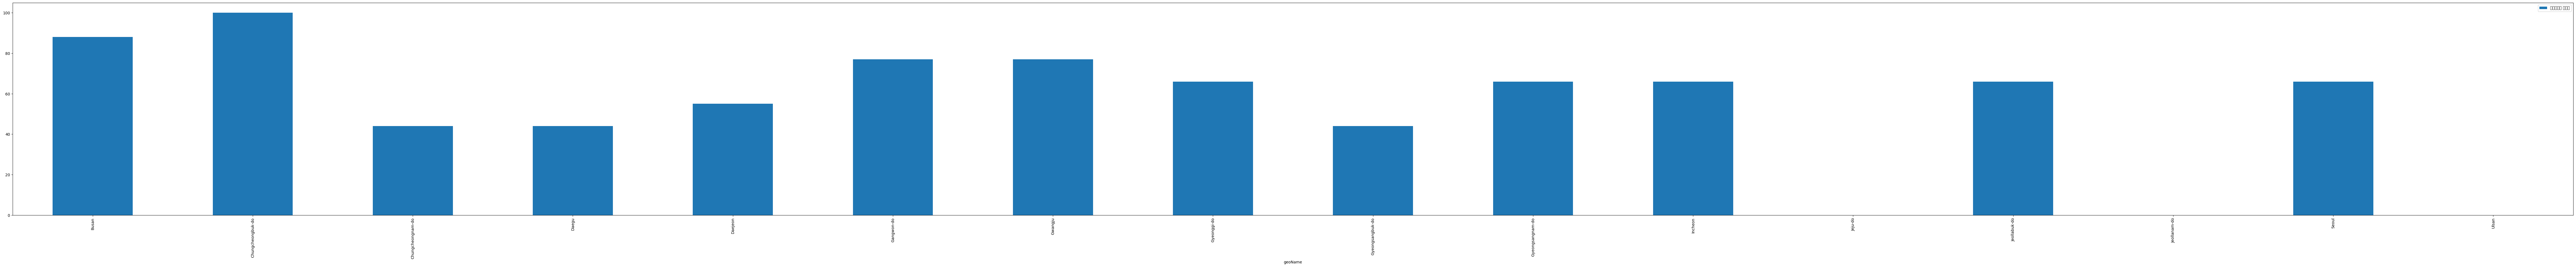

In [7]:
google_trends.interest_by_region().reset_index().plot(x='geoName', y=keyword_list[0], figsize=(120, 10), kind ='bar')

In [ ]:
google_trends.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)

In [9]:
google_trends.interest_over_time()

,알레르기성 결막염,isPartial
date,,
2019-01-01,0,False
2019-02-01,0,False
2019-03-01,0,False
2019-04-01,0,False
2019-05-01,0,False
...,...,...
2024-01-01,30,False
2024-02-01,0,False
2024-03-01,35,False


In [ ]:
google_trends.build_payload(kw_list=['pizza', 'bagel'], timeframe=['2022-09-04 2022-09-10', '2022-09-18 2022-09-24'])
google_trends.multirange_interest_over_time()

,[0] pizza date,[0] pizza value,[1] bagel date,[1] bagel value
0,Average,86,Average,0
1,"Sep 4, 2022",83,"Sep 18, 2022",0
2,"Sep 5, 2022",76,"Sep 19, 2022",0
3,"Sep 6, 2022",73,"Sep 20, 2022",0
4,"Sep 7, 2022",82,"Sep 21, 2022",0
5,"Sep 8, 2022",93,"Sep 22, 2022",0
6,"Sep 9, 2022",93,"Sep 23, 2022",0
7,"Sep 10, 2022",100,"Sep 24, 2022",0


In [24]:
kw_list = ["Blockchain"]
google_trends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

google_trends.build_payload(kw_list=['pizza', 'bagel'], timeframe=['2022-09-04 2022-09-10', '2022-09-18 2022-09-24'])
google_trends.multirange_interest_over_time()

,[0] pizza date,[0] pizza value,[1] bagel date,[1] bagel value
0,Average,78,Average,0
1,"Sep 4, 2022",61,"Sep 18, 2022",0
2,"Sep 5, 2022",65,"Sep 19, 2022",0
3,"Sep 6, 2022",56,"Sep 20, 2022",0
4,"Sep 7, 2022",71,"Sep 21, 2022",0
5,"Sep 8, 2022",97,"Sep 22, 2022",0
6,"Sep 9, 2022",98,"Sep 23, 2022",0
7,"Sep 10, 2022",100,"Sep 24, 2022",0


In [25]:
google_trends.get_historical_interest(kw_list, year_start=2018, month_start=1, day_start=1, hour_start=0, year_end=2018, month_end=2, day_end=1, hour_end=0, cat=0, geo='', gprop='', sleep=0)

NotImplementedError: This method has been removed for incorrectness. It will be removed completely in v5.
If you'd like similar functionality, please try implementing it yourself and consider submitting a pull request to add it to pytrends.
          
There is discussion at:
https://github.com/GeneralMills/pytrends/pull/542

In [26]:
google_trends.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)

,pizza,bagel
geoName,,
Busan,0,0
Chungcheongbuk-do,0,0
Chungcheongnam-do,100,0
Daegu,0,0
Daejeon,0,0
Gangwon-do,0,0
Gwangju,0,0
Gyeonggi-do,100,0
Gyeongsangbuk-do,0,0


In [27]:
google_trends.related_topics()

{}

In [28]:
google_trends.related_queries()

IndexError: list index out of range

In [31]:
google_trends.trending_searches(pn='united_states') # trending searches in real time for United States

,0
0,Packers vs Vikings
1,Cowboys vs Eagles
2,Saquon Barkley
3,Raiders vs Saints
4,Jets vs Bills
5,NFL Draft order
6,Dorian Finney-Smith
7,Leicester City vs Man City
8,West Ham vs Liverpool
9,Sam Darnold


In [33]:
google_trends.realtime_trending_searches(pn='US') # realtime search trends for United States

""


In [32]:
google_trends.trending_searches(pn='japan') # Japan

,0
0,高校サッカー選手権大会
1,韓国 飛行機 事故
2,モンスト
3,魔法少女リリカルなのは
4,箱根駅伝 区間エントリー
5,富士山女子駅伝
6,佳子さま
7,鳥取城北バスケ
8,東京大賞典
9,グランメゾン東京


In [34]:
google_trends.realtime_trending_searches(pn='IN') # India

""


In [35]:
google_trends.top_charts("2019", hl='en-US', tz=300, geo='GLOBAL')

,title,exploreQuery
0,India vs South Africa,
1,Cameron Boyce,
2,Copa America,
3,Bangladesh vs India,
4,iPhone 11,
5,Game of Thrones,
6,Avengers: Endgame,
7,Joker,
8,Notre Dame,
9,ICC Cricket World Cup,


In [37]:
google_trends.suggestions("pizza")

[{'mid': '/m/0663v', 'title': 'Pizza', 'type': 'Dish'},
 {'mid': '/m/0dfxdnc', 'title': 'Pizza dough', 'type': 'Food'},
 {'mid': '/g/11k19hmrkk', 'title': 'Licorice Pizza', 'type': '2021 film'},
 {'mid': '/g/11fl7dydwb', 'title': 'Pizza Oven', 'type': 'Topic'},
 {'mid': '/m/0gykbn', 'title': 'Pizza sauce', 'type': 'Food'}]

In [38]:
google_trends.categories()

{'children': [{'children': [{'name': 'Celebrities & Entertainment News',
     'id': 184},
    {'children': [{'name': 'Animated Films', 'id': 1104},
      {'name': 'Anime & Manga', 'id': 317},
      {'name': 'Cartoons', 'id': 319},
      {'name': 'Comics', 'id': 318}],
     'name': 'Comics & Animation',
     'id': 316},
    {'children': [{'children': [{'name': 'Film & TV Awards', 'id': 1108},
        {'name': 'Film & TV Production', 'id': 1117}],
       'name': 'Film & TV Industry',
       'id': 1116},
      {'children': [{'name': 'Music Awards', 'id': 1113},
        {'name': 'Record Labels', 'id': 1114}],
       'name': 'Recording Industry',
       'id': 1115}],
     'name': 'Entertainment Industry',
     'id': 612},
    {'children': [{'name': 'Clubs & Nightlife', 'id': 188},
      {'name': 'Concerts & Music Festivals', 'id': 891},
      {'name': 'Film Festivals', 'id': 1086},
      {'name': 'Live Sporting Events', 'id': 1273},
      {'name': 'Movie Listings & Theater Showtimes', 'id':